
K-Means Clustering Performance:
Silhouette Score: 0.52
Calinski-Harabasz Index: 180.98
Davies-Bouldin Index: 0.74

Hierarchical Clustering Performance:
Silhouette Score: 0.51
Calinski-Harabasz Index: 286.33
Davies-Bouldin Index: 0.71

Mean Shift Clustering Performance:
Silhouette Score: 0.40
Calinski-Harabasz Index: 152.61
Davies-Bouldin Index: 0.60


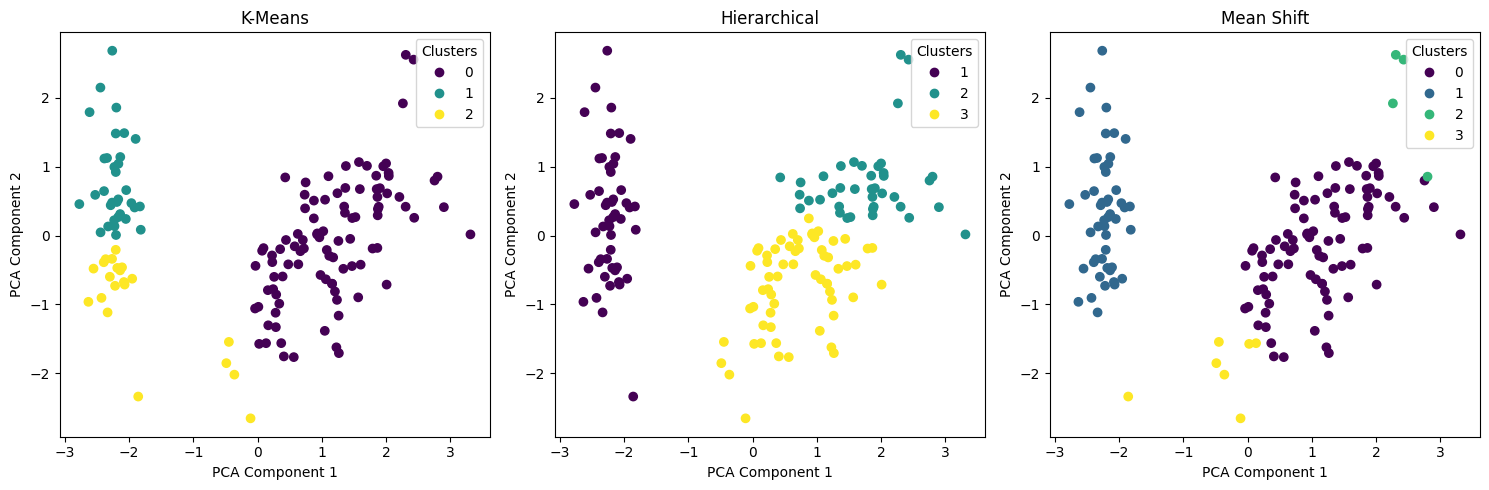

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

# Load the Iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Standardizing the dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# PCA Transformation
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Function to apply clustering and evaluate

def cluster_and_evaluate(X, method, **kwargs):
    if method == 'kmeans':
        model = KMeans(n_clusters=3, random_state=42, **kwargs)
    elif method == 'hierarchical':
        linkage_matrix = linkage(X, method='ward')
        labels = fcluster(linkage_matrix, 3, criterion='maxclust')
        return labels, linkage_matrix
    elif method == 'meanshift':
        bandwidth = estimate_bandwidth(X, quantile=0.2, random_state=42)
        model = MeanShift(bandwidth=bandwidth, **kwargs)
    else:
        raise ValueError("Invalid method")

    labels = model.fit_predict(X)
    return labels, None

# Apply clustering methods
labels_kmeans, _ = cluster_and_evaluate(df_pca, 'kmeans')
labels_hierarchical, linkage_matrix = cluster_and_evaluate(df_pca, 'hierarchical')
labels_meanshift, _ = cluster_and_evaluate(df_pca, 'meanshift')

# Evaluate clustering performance
for method, labels in zip(['K-Means', 'Hierarchical', 'Mean Shift'],
                          [labels_kmeans, labels_hierarchical, labels_meanshift]):
    print(f"\n{method} Clustering Performance:")
    print(f"Silhouette Score: {silhouette_score(df_pca, labels):.2f}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz_score(df_pca, labels):.2f}")
    print(f"Davies-Bouldin Index: {davies_bouldin_score(df_pca, labels):.2f}")

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
methods = ['K-Means', 'Hierarchical', 'Mean Shift']
labels_list = [labels_kmeans, labels_hierarchical, labels_meanshift]

for ax, method, labels in zip(axes, methods, labels_list):
    scatter = ax.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis')
    ax.set_title(method)
    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")
    ax.legend(*scatter.legend_elements(), title="Clusters")

plt.tight_layout()
plt.show()
